# 1. Introduction

Nama: Riko Fadilah Alam

Batch: RMT-043

Notebook ini berisi tentang Model Machine Learning untuk pengambilan keputusan dalam memprediksi kelayakan nasabah untuk mendapatkan pinjaman. Model akan memprediksi berdasarkan informasi yang diberikan saat mengisi formulir pendaftaran.




# 2. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 3. Data Loading

In [ ]:
# Memuat data set
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Melihat informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Pada dataset terdapat 12 kolom dengan 10.000 baris dan tidak terdapat missing value.

In [ ]:
# Melihat unique value pada dataset
for col in df:
    print(f'\nKolom: {col}')
    print(df[col].unique())


Kolom: customer_id
[15634602 15647311 15619304 ... 15584532 15682355 15628319]

Kolom: credit_score
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 63

In [ ]:
# Membuat salinan dataset untuk proses analisis tanpa mengubah dataset lama
df = df.copy()
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Menghapus kolom customer_id
df = df.drop('customer_id', axis =1)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 4. Exploratory Data Analysis (EDA)

## 4.1 Analisis distribusi Target
Pada EDA ini ditujukan untuk melihat perbandingan sebaran churn pada dataset.

C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_8144\84034198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='pastel')


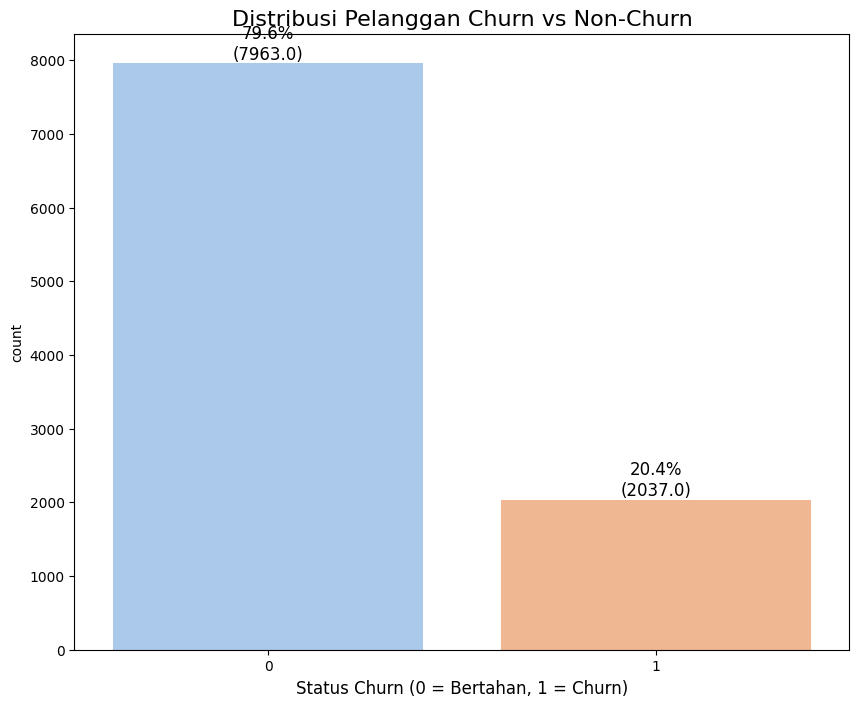

In [ ]:
# Visualisasi Distribusi dari nasabah yang bertahan dan pergi (churn)
plt.figure(figsize=(10, 8))
sns.countplot(x='churn', data=df, palette='pastel')
plt.title('Distribusi Pelanggan Churn vs Non-Churn', fontsize=16)
plt.xlabel('Status Churn (0 = Bertahan, 1 = Churn)', fontsize=12)

# Menambahkan nilai persentase
total = len(df)
ax = plt.gca()
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%\n({p.get_height()})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.show()


Berdasarkan hasil dataset didapatkan hasil bahwa sebanyak 7963 orang bertahan dan 2037 orang churn.

## 4.2 Analisis Fitur Numerikal
Pada EDA ini ditujukan untuk melihat sebaran data dari Fitur-fitur yang terdapat pada dataset. Hal ini bertujuan untuk mendeteksi adanya skewness atau outlier.

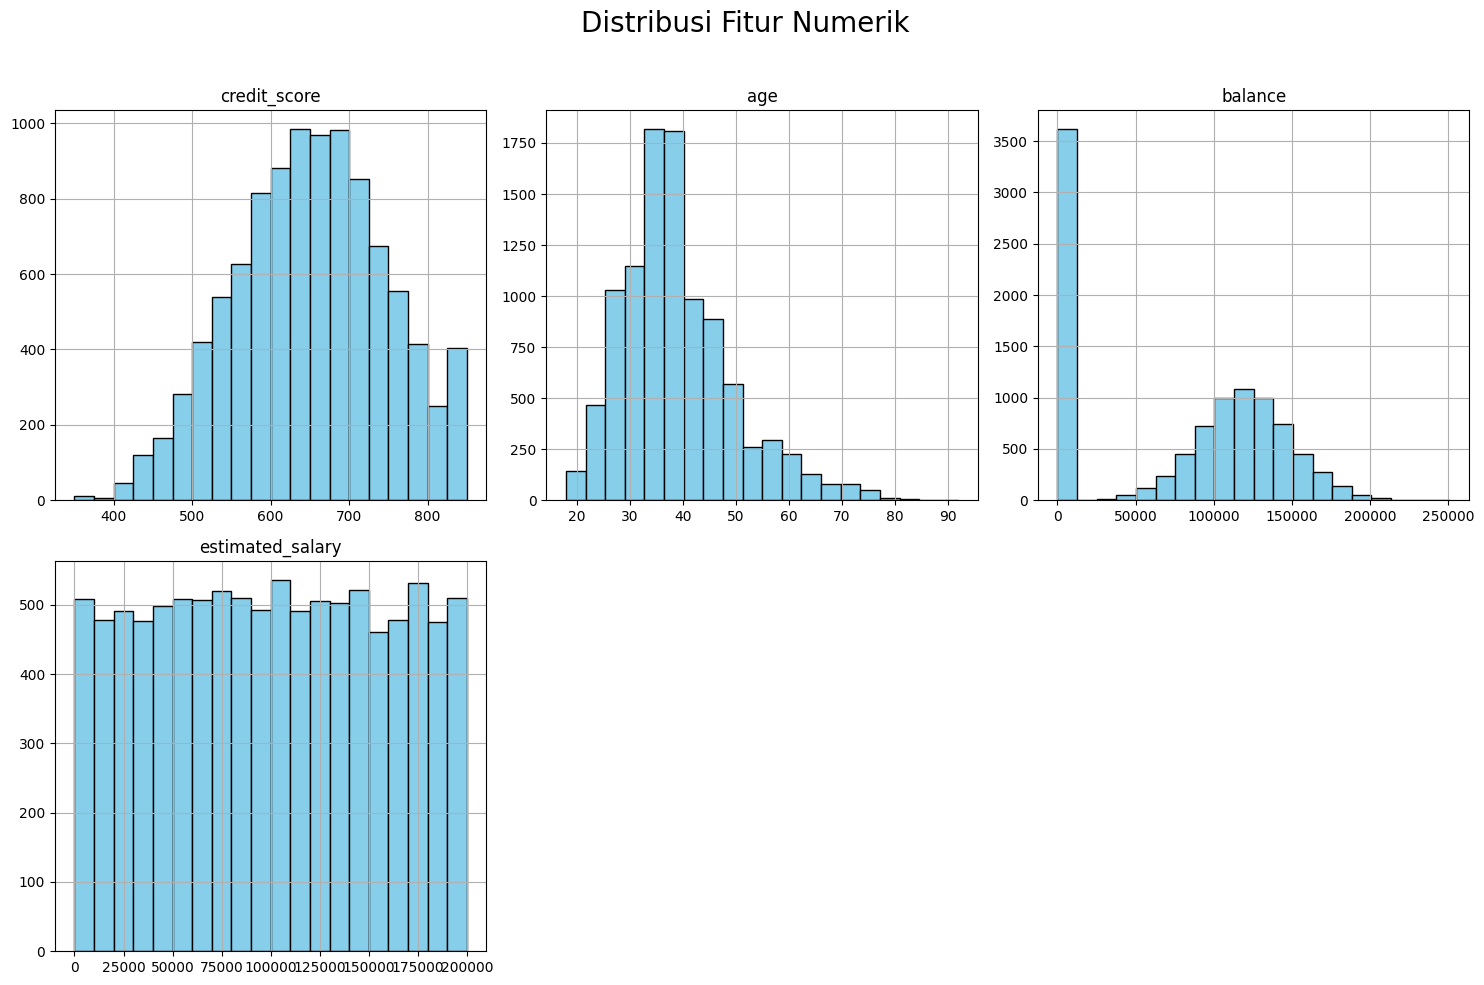

In [ ]:
# Visualisasi dari kolom numerikal

numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Cek skew dari tiap kolom numerikal 
numerical_features_info = df.select_dtypes(include=['int64', 'float64'])
num_check = ['credit_score', 'age', 'balance', 'estimated_salary']
skew1_num = numerical_features_info[num_check].skew()
skew1_num

credit_score       -0.071607
age                 1.011320
balance            -0.141109
estimated_salary    0.002085
dtype: float64

Berdasarkan hasil tersebut nilai skewness di beberapa fitur cenderung normal, namun kolom age sangat condong kanan. Artinya pada kolom age mayoritas usia didominasi usia yang lebih muda namun terdapat sebagian kecil nasabah yang memiliki perbedaa usia yang sangat jauh.

## 4.3 Analisis Distribusi usia pelanggan yang churn
Pada EDA ini ditujukan untuk melihat sebaran data dari fitur 'age' yang rentan untuk churn. 

In [ ]:
# Melihat informasi jika membandingkan sebaran kolom umur pada kolom churn
churn_by_age = df.groupby('churn')['age'].describe()
churn_by_age

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_8144\2273676105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=df, palette='coolwarm')


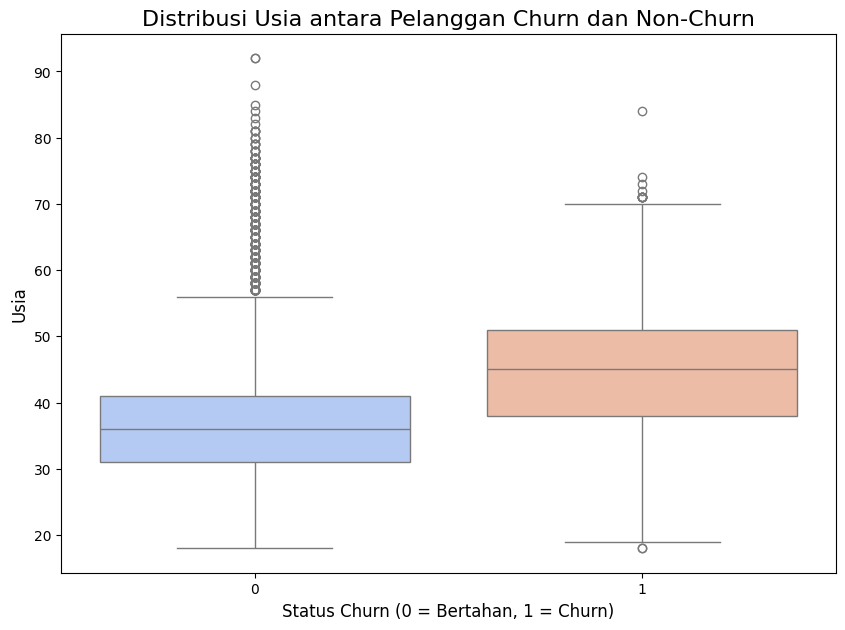

In [ ]:
# Visualiasi Distribusi Usia antara churn dan non-churn
plt.figure(figsize=(10, 7))
sns.boxplot(x='churn', y='age', data=df, palette='coolwarm')
plt.title('Distribusi Usia antara Pelanggan Churn dan Non-Churn', fontsize=16)
plt.xlabel('Status Churn (0 = Bertahan, 1 = Churn)', fontsize=12)
plt.ylabel('Usia', fontsize=12)
plt.show()

Berdasarkan hasil analisis diatas:
> Rata-rata usia nasabah yang churn adalah 44,8 tahun dan nasabah yang bertahan adalah 37,4 tahun

> Nilai median pada nasabah yang churn adalah 45 tahun dan nasabah yang bertahan adalah 36 tahun.

> Untuk nasabah yang churn, 50% dari mereka berusia antara 38 tahun (Q1) dan 51 tahun (Q3)

Dapat disimpulkan bahwa nasabah yang churn adalah rentang usia yang lebih tua, usia median mereka lebih tinggi daripada nasabah yang bertahan, sehingga usia termasuk salah satu faktor prediktor yang penting.



## 4.4 Analisis fitur balance bernilai 0
Pada EDA ini ditujukan untuk melihat sebaran data dari fitur 'balance' yang memiliki nilai 0. 

In [ ]:
# Melihat persentase nilai balance 0
zero_balance = df[df['balance']== 0]
num_zero_balance = len(zero_balance)
total_cus_zero = len(df)
percentage_zero_balance = (num_zero_balance/total_cus_zero) * 100
percentage_zero_balance

36.17

C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_8144\2126563807.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_balance_status.index, y=churn_rate_by_balance_status.values, palette='coolwarm')



Tingkat Churn Rata-rata Berdasarkan Status Saldo:
has_balance
0    0.138236
1    0.240796
Name: churn, dtype: float64


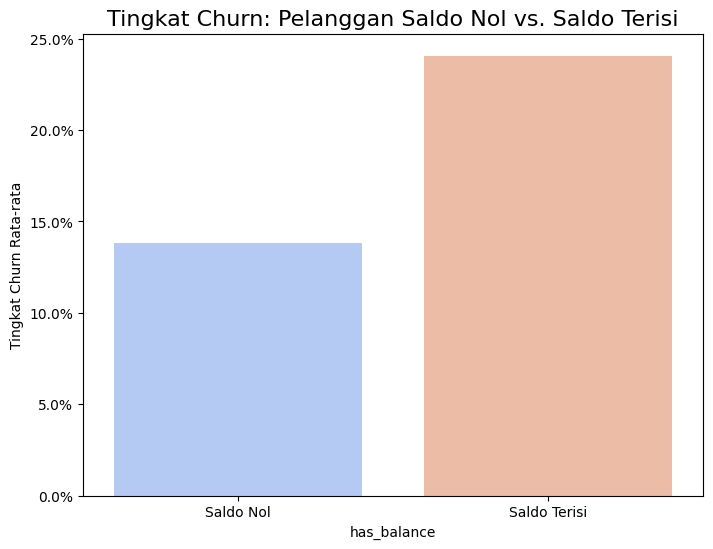

In [ ]:
# Membuat kolom baru dengan kriteria 1 memiliki saldo dan 0 tidak memiliki saldo
df['has_balance'] = (df['balance'] > 0).astype(int)

# Membandingkan tingkat churn
churn_rate_by_balance_status = df.groupby('has_balance')['churn'].mean()
print("\nTingkat Churn Rata-rata Berdasarkan Status Saldo:")
print(churn_rate_by_balance_status)

# Visualiasi tingkat churn dari nasabah dengan saldo nol dan tidak nol 
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_balance_status.index, y=churn_rate_by_balance_status.values, palette='coolwarm')
plt.title('Tingkat Churn: Pelanggan Saldo Nol vs. Saldo Terisi', fontsize=16)
plt.xticks([0, 1], ['Saldo Nol', 'Saldo Terisi'])
plt.ylabel('Tingkat Churn Rata-rata')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1%}'))
plt.show()

In [ ]:
# Melihat hubungan sebaran kolom balance lebih dari 0 dan churn
balance_not_zero = df[df['balance']> 0]
balance_by_churn = balance_not_zero.groupby('churn')['balance'].describe()
balance_by_churn

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,4846.0,119535.864270,29944.927372,14262.80,99118.23,119791.215,139747.3975,221532.80
1,1537.0,120746.971132,30555.192802,3768.69,103700.69,119948.090,137986.5800,250898.09


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_8144\1698752909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='balance', data=df_with_balance, palette='viridis')


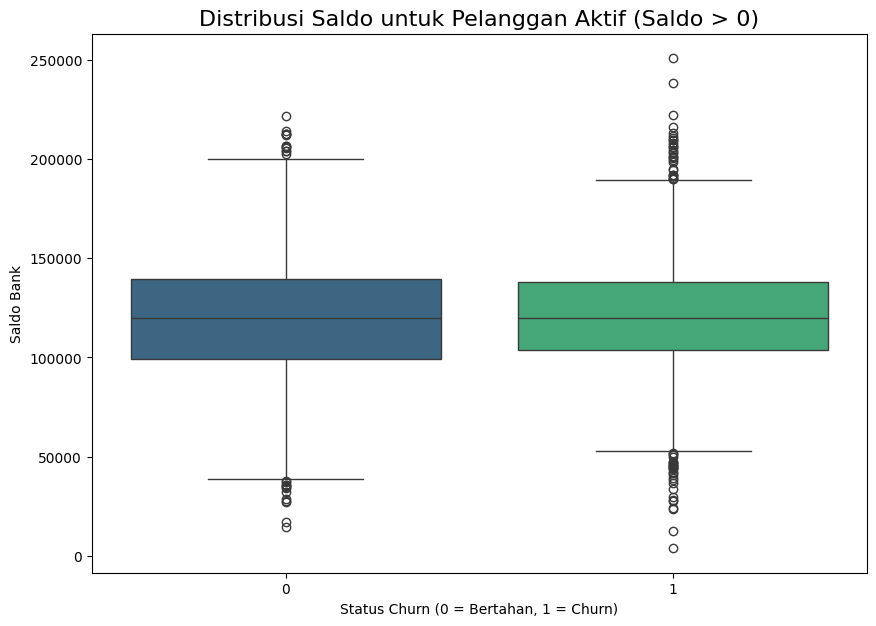

In [ ]:
# Filter data untuk pelanggan yang memiliki saldo
df_with_balance = df[df['balance'] > 0]

# Visualisai Distribusi saldo dari tiap pelanggan aktif  
plt.figure(figsize=(10, 7))
sns.boxplot(x='churn', y='balance', data=df_with_balance, palette='viridis')
plt.title('Distribusi Saldo untuk Pelanggan Aktif (Saldo > 0)', fontsize=16)
plt.xlabel('Status Churn (0 = Bertahan, 1 = Churn)')
plt.ylabel('Saldo Bank')
plt.show()

Berdasarkan analisis ini terdapat beberapa nasabar dengan Balance 0, hal ini dapat disebabkan karena beberapa kemungkinan.
a. Nasabah memindahkan semua dananya ke rekening lain.
b. Membuka rekening di masa lalu.
c. Rekening khusus untuk membayar tagihan bulanan kartu dan diisi sebelum jatuh tempo
Berdasarkan hal tersebut rekening masih tercatat aktif di sistem bankm tapi memiliki saldo nol. Hal ini dapat sebagai penunjuk bahwa terdapat pelanggan yang bertahan bukan merupakan yang tidak puas, namun melainkan pelanggan yang melupakan rekeningnya, rekening khusus pembayaran kartu, dan nasabah yang hanya menjadikan akun bank tersebut sebagai tempat penyimpanan sementara.

## 4.5 Analisis fitur balance
Pada EDA ini ditujukan untuk melihat sebaran data dari keseluruhan fitur 'balance'.

In [ ]:
# Melihat hubungan sebaran kolom balance dan churn
balance_analysis = df.groupby('churn')['balance'].describe()
balance_analysis

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_8144\2014229014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='balance', data=df, palette='magma')


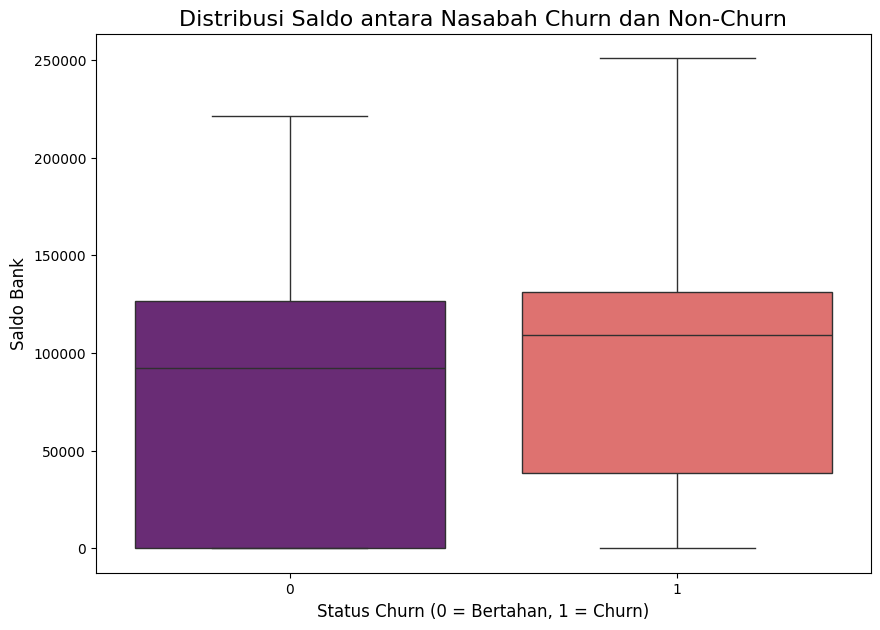

In [ ]:
# Visualisai distribusi saldo antara nasabah Churn dan Non-Churn
plt.figure(figsize=(10, 7))
sns.boxplot(x='churn', y='balance', data=df, palette='magma')
plt.title('Distribusi Saldo antara Nasabah Churn dan Non-Churn', fontsize=16)
plt.xlabel('Status Churn (0 = Bertahan, 1 = Churn)', fontsize=12)
plt.ylabel('Saldo Bank', fontsize=12)
plt.show()

Berdasarkan analisis diatas didapatkan hasil

> Terdapat dominasi pelanggan dengan saldo nol di target bernilai 0 atau bertahan.

> Pelanggan dengan nilai saldo yang sedikit lebih tinggi cenderung memiliki nilai churn yang tinggi.

> Pada kuartil pertama, lebih dari 25% kelompok yang bertahan memliki saldo 0 sedangkan pada kelompok yang churn hanya kurang dari 25% yang memiliki saldo 0.

## 4.6 Analisis churn berdasarkan jumlah produk 
Pada EDA ini ditujukan untuk melihat sebaran data dari fitur 'product_number'.

In [ ]:
# Melihat sebaran data nasabah pada kolom churn dengan product_number
product_analysis = df.groupby('churn')['products_number'].describe()
product_analysis

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,7963.0,1.544267,0.509536,1.0,1.0,2.0,2.0,3.0
1,2037.0,1.475209,0.801521,1.0,1.0,1.0,2.0,4.0


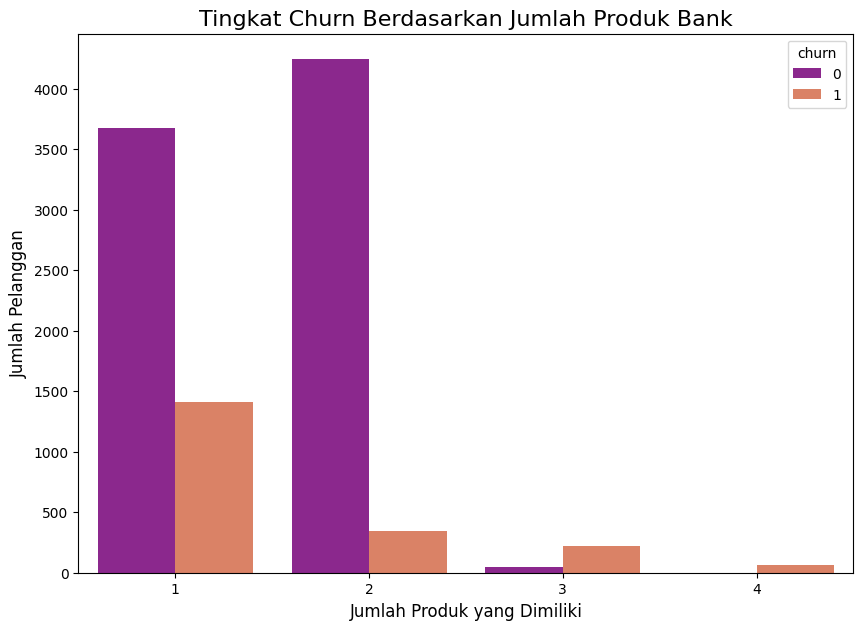

In [ ]:
# Visualisasi tingkatan churn berdasarkan jumlah produk Bank yang dimiliki
plt.figure(figsize=(10, 7))
sns.countplot(x='products_number', hue='churn', data=df, palette='plasma')
plt.title('Tingkat Churn Berdasarkan Jumlah Produk Bank', fontsize=16)
plt.xlabel('Jumlah Produk yang Dimiliki', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.show()

Berdasarkan analisis yang telah dilakukan

> Pada jumlah produk 1 terdapat banyak nasabah yang pergi, hal ini dapat disebabkan karena hanya memiliki satu produk dari bank rentan membuat nasabah untuk pergi karena merasa kurang akrab dengan ekosistem bank dan mudah untuk berpindah ke bank lain. 

> Pada jumlah produk 2, walaupun masih terdapat nasabah yang churn perbandingannya terlalu jauh. Hal ini dapat disebabkan mereka merasa lebih akrab dengan ekosistem bank karena memiliki dua produk seperti kartu kredit dan tabungan.  

> Nasabah yang memiliki jumlah produk 3 & 4 cenderung melakukan churn. Perlu kita pastikan produk-produk tersebut memiliki kualitas yang buruk atau tidak memenihu ekspektasi dari nasabah, sehingga menimbulkan masalah bagi nasabah yang mengakibatkan untuk pergi.

> Sehingga dapat disarankan nanti perusahaan dapat fokus untuk menambah nasabah dengan dua produk.

## 4.7 Analisis usia dan saldo berdasarkan stasus churn 
Pada EDA ini ditujukan untuk melihat sebaran data dari kolom usia dan saldo mereka berdasarkan nilai churn

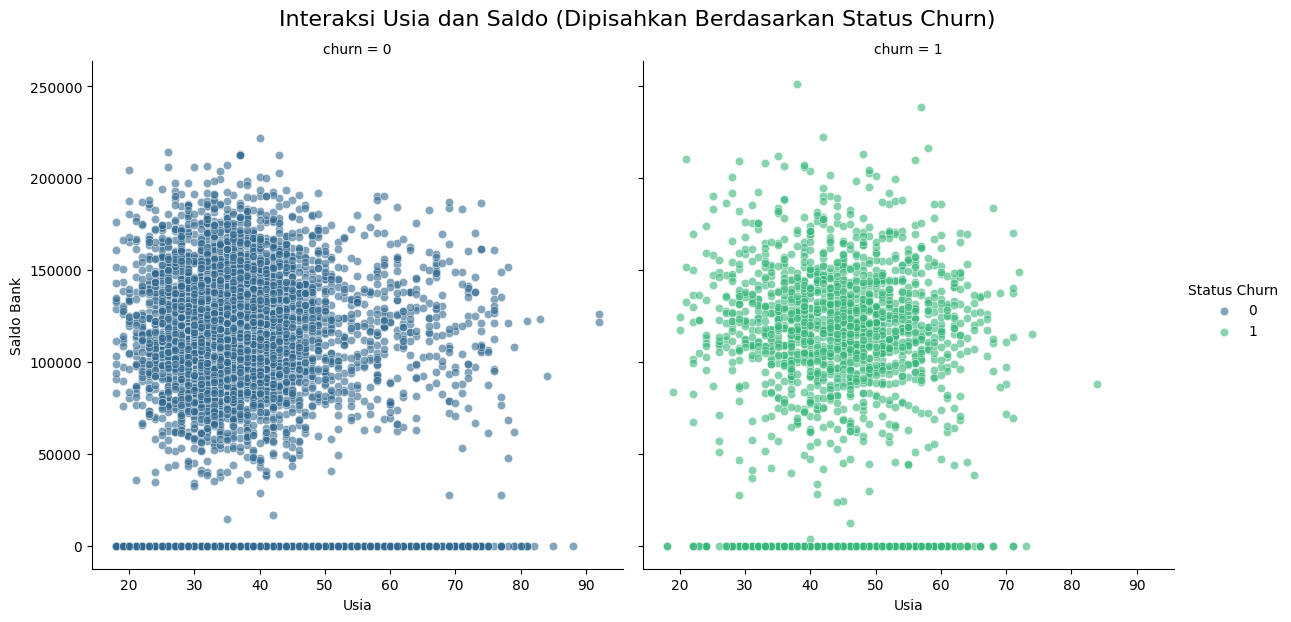

In [ ]:
# Visualisasi sebaran data antara usia dan saldo yang dimiliki
g = sns.FacetGrid(df, col="churn", hue="churn", height=6, palette='viridis')
g.map(sns.scatterplot, "age", "balance", alpha=0.6)
g.fig.suptitle('Interaksi Usia dan Saldo (Dipisahkan Berdasarkan Status Churn)', y=1.03, fontsize=16)
g.set_axis_labels("Usia", "Saldo Bank")
g.add_legend(title='Status Churn')

plt.show()

Berdasarkan hasil analisis tersebut didapatkan hasil 

> Sebagian besar pelanggan yang memiliki saldo nol adalah pelanggan cukup setia, karena sebaran data pada saldo nol cukup padat.

> Tidak terdapat kelompok yang dominan dalam pelanggan yang bertahan.

> Terdapat lebih sedikit nasabah dibawah umur 40 dan diatas 60 yang melakukan churn.

> Kelompok usia 40-60 memiliki nilai churn yang cukup tinggi.

> Sehingga jika berfokus meningkatkan saldo dari nasabah maka dapat memingkatkan risiko churn karena nasabah dengan usia 40-60 yang memiliki saldo cukup tinggi cenderung melakukan churn. Sehingga disarankan terdapat opsi tambahan untuk rentan usia 40-60 tahun yang memiliki saldo tinggi agar tidak churn seperti produk investasi maupun layanan yang lebih personal.

## 4.8 Analisis fitur tenure dengan credit_score
Pada EDA ini ditujukan untuk melihat hubungan dari kolom tenure dan credit score.

In [ ]:
# Melihat informasi dari kolom tenure berdasarkan credit_score mereka 
tenure_credit_analysis = df.groupby('tenure')['credit_score'].describe()
tenure_credit_analysis

,count,mean,std,min,25%,50%,75%,max
tenure,,,,,,,,
0,413.0,652.043584,96.408808,350.0,590.0,653.0,717.00,850.0
1,1035.0,648.806763,96.227373,350.0,578.0,652.0,717.00,850.0
2,1048.0,652.832061,96.353984,399.0,588.0,654.0,717.25,850.0
3,1009.0,650.530228,97.458861,350.0,581.0,650.0,716.00,850.0
4,989.0,651.502528,95.742143,351.0,583.0,651.0,718.00,850.0
5,1012.0,650.527668,96.422651,395.0,584.0,654.0,721.00,850.0
6,967.0,647.380558,98.912565,359.0,581.5,648.0,718.00,850.0
7,1028.0,649.606031,95.577970,373.0,586.0,650.0,717.00,850.0
8,1025.0,647.749268,97.443326,358.0,583.0,649.0,710.00,850.0


C:\Users\MyBook Hype AMD\AppData\Local\Temp\ipykernel_8144\1716307904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tenure', y='credit_score', data=df, palette='coolwarm')


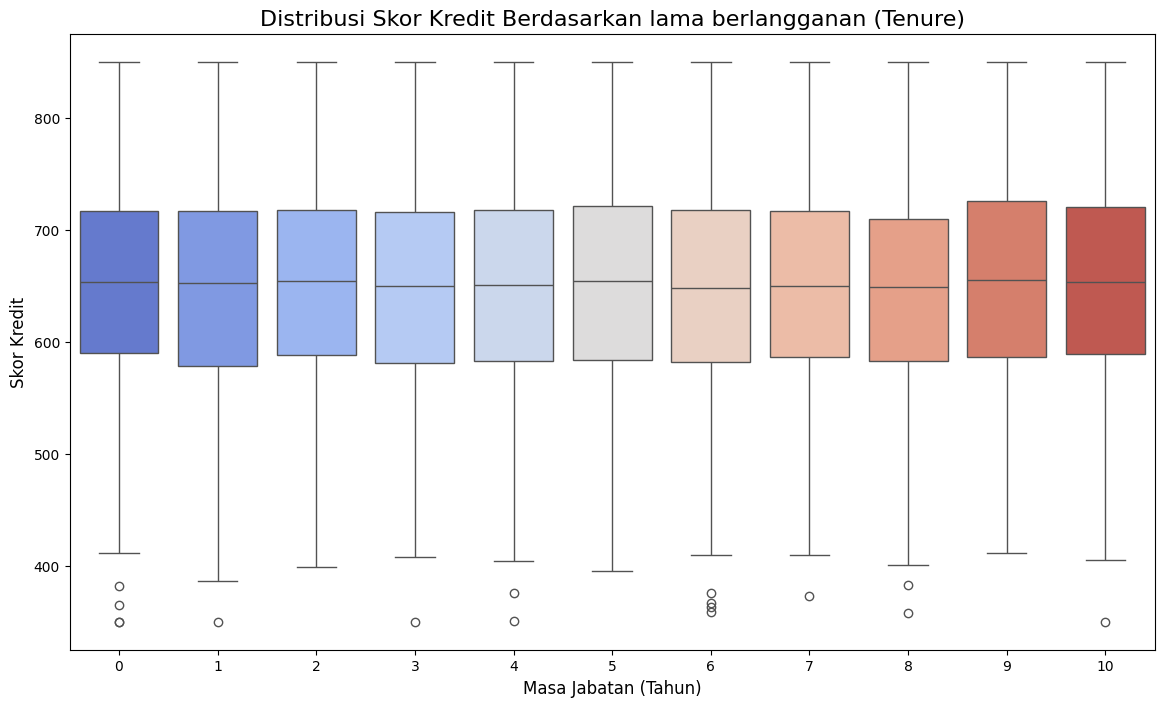

In [ ]:
# Visualisasi dari kolom credit_score berdasarkan tenure
plt.figure(figsize=(14, 8))
sns.boxplot(x='tenure', y='credit_score', data=df, palette='coolwarm')
plt.title('Distribusi Skor Kredit Berdasarkan lama berlangganan (Tenure)', fontsize=16)
plt.xlabel('Masa Jabatan (Tahun)', fontsize=12)
plt.ylabel('Skor Kredit', fontsize=12)
plt.show()

Berdasarkan hasil analisis di atas nilai mean, standar deviasi, dan rentang kuartil (25% dan 75%) cukup merata atau stabil. Sehingga tidak adanya korelasi yang kuat antara lama nasabah berlangganan jasa suatu bank dengan nilai credit score mereka. Hal ini menunjukkan bahwa perlu ditekankan di dataet ini bahwa loyalitas dari suatu nasabah kurang berkorelasi dengan credit score mereka.

## 4.9 Analisis korelasi dari tiap kolom numerikal
Pada EDA ini ditujukan untuk melihat nilai korelasi dari setiap fitur numerikal di dataset.

In [ ]:
# Melihat korelasi dari kolom numerikal
correlation_df = df[numerical_features + ['churn']]
corr_matrix = correlation_df.corr()
corr_matrix

,credit_score,age,balance,estimated_salary,churn
credit_score,1.000000,-0.003965,0.006268,-0.001384,-0.027094
age,-0.003965,1.000000,0.028308,-0.007201,0.285323
balance,0.006268,0.028308,1.000000,0.012797,0.118533
estimated_salary,-0.001384,-0.007201,0.012797,1.000000,0.012097
churn,-0.027094,0.285323,0.118533,0.012097,1.000000


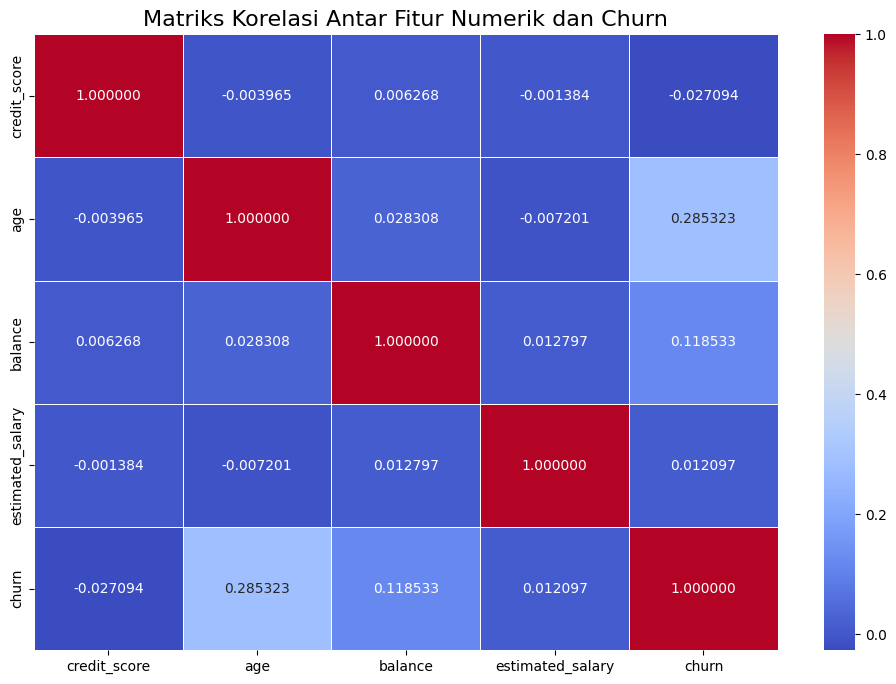

In [ ]:
# Melihat korelasi dari kolom numerikal
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.6f', linewidths=.5)
plt.title('Matriks Korelasi Antar Fitur Numerik dan Churn', fontsize=16)
plt.show()

Berdasarkan hasil analisis tersebut didapatkan hasil 

> Hubungan antar fitur tergolong lemah

> Setiap fitur dapat dimasukkan tanpa khawatir nilai dari suatu fitur akan mengganggu fitur yang lain. 

> Kolom umur memiliki nilai terkuat untuk churn.


# 5.Feature Engineering


In [ ]:
df = df.drop('has_balance', axis=1)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Tidak ada missing value sehingga tidak dilakukan handle missing value.

In [ ]:
# Memisahkan Fitur(X) dan Target (y)
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
numerical_columns = ['credit_score','age', 'balance', 'estimated_salary']
categorical_columns = ['country', 'gender','tenure', 'products_number', 'credit_card', 'active_member']

In [ ]:
# Scaling kolom numerikal dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [ ]:
# Cek cardinality
for column in df.columns:
    cardinality = df[column].nunique()
    print(f"Kolom {column}: Memiliki {cardinality} unique values")

Kolom credit_score: Memiliki 460 unique values
Kolom country: Memiliki 3 unique values
Kolom gender: Memiliki 2 unique values
Kolom age: Memiliki 70 unique values
Kolom tenure: Memiliki 11 unique values
Kolom balance: Memiliki 6382 unique values
Kolom products_number: Memiliki 4 unique values
Kolom credit_card: Memiliki 2 unique values
Kolom active_member: Memiliki 2 unique values
Kolom estimated_salary: Memiliki 9999 unique values
Kolom churn: Memiliki 2 unique values


Berdasarkan hasil tersebut kolom kategorikal memiliki nilai cardinality yang rendah sehingga tidak dilakukan handling cardinality.

In [ ]:
# Split data test dan data train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666, stratify=y)

# 6. Model Definition 

In [ ]:
# Membuat function untuk tiap model yang akan digunakan
models = {
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(probability=True, random_state=666),
        'Decision Tree': DecisionTreeClassifier(random_state=666),
        'Random Forest': RandomForestClassifier(random_state=666),
        'Gradient Boosting': GradientBoostingClassifier(random_state=666)
}

# 7. Model Training

In [ ]:
# Membuat function untuk Training model dengan Cross-Validation
results = {}
for name, model in models.items():
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('sampler', SMOTE(random_state=666)),
            ('classifier', model)
        ])
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
        results[name] = cv_scores
        print(f"Hasil {name}: Mean ROC-AUC = {cv_scores.mean():.4f} (Std = {cv_scores.std():.4f})")


Hasil KNN: Mean ROC-AUC = 0.7675 (Std = 0.0096)
Hasil SVM: Mean ROC-AUC = 0.8398 (Std = 0.0073)
Hasil Decision Tree: Mean ROC-AUC = 0.6913 (Std = 0.0172)
Hasil Random Forest: Mean ROC-AUC = 0.8503 (Std = 0.0087)
Hasil Gradient Boosting: Mean ROC-AUC = 0.8598 (Std = 0.0094)


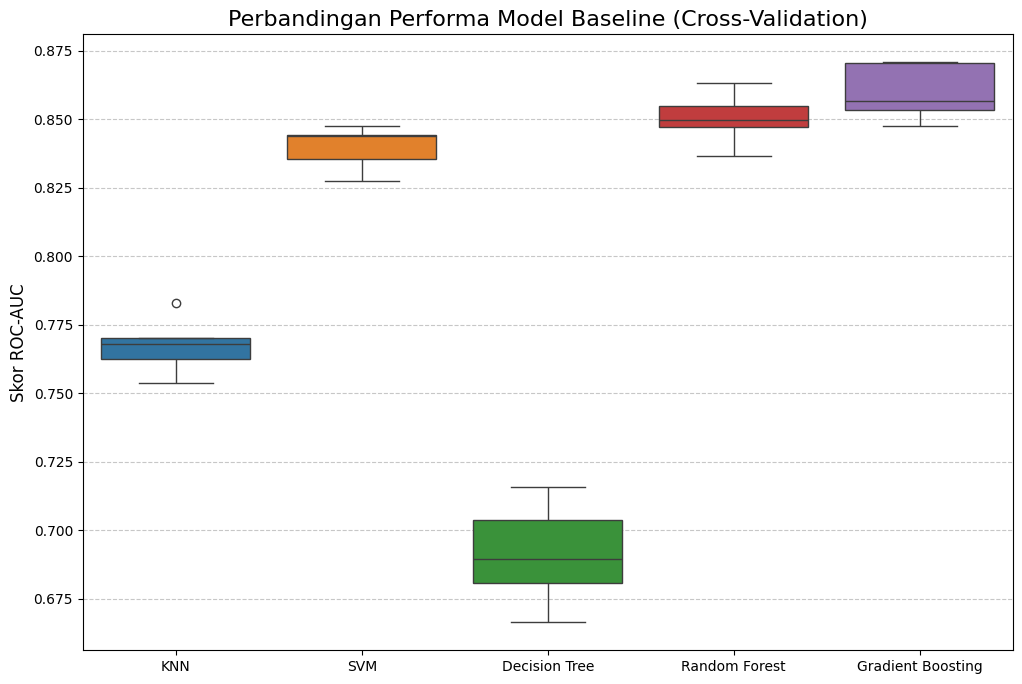


 Model terbaik berdasarkan Cross-Validation adalah: Gradient Boosting


In [ ]:
# Visualisasi perbandingan performa model
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 8))
sns.boxplot(data=results_df)
plt.title('Perbandingan Performa Model Baseline (Cross-Validation)', fontsize=16)
plt.ylabel('Skor ROC-AUC', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menentukan model terbaik dari hasil CV
best_model_name_cv = results_df.mean().idxmax()
print(f"\n Model terbaik berdasarkan Cross-Validation adalah: {best_model_name_cv}")

In [ ]:
# Hyperparameter Tuning untuk model terbaik
best_model_object = models[best_model_name_cv]
tuning_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=666)),
    ('classifier', best_model_object)
])

# Mendefinisikan nilai hyperparameter yang akan digunakan pada Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5, 7]
}

# 4. Visualisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=tuning_pipeline, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# 5. Tampilkan hasil tuning
print(f"\nParameter terbaik ditemukan: {grid_search.best_params_}")
print(f"Skor ROC-AUC terbaik dari tuning (di data latih): {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Parameter terbaik ditemukan: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Skor ROC-AUC terbaik dari tuning (di data latih): 0.8613


Berdasarkan hasil diatas didapatkan hasil

> Model terbaik dari kelima model adalah Gradient Boosting dengan nilai hyperparameter seperti berikut
- classifier__learning_rate: 0.01
- classifier__max_depth: 5
- classifier__n_estimators: 300

> Gradient Boosting digunakan karena setelah kita analisis hasil EDA memiliki hubungan yang kompleks dan non-linear, sehingga model ini cocok karena dapat menangani interaksi antar fitur.

> Keunggulan dari gradient boosting adalah nilai akurasinya tinggi untuk data tabular, dapat dioptimalkan dengan hyperparameter tuning.

> Nilai classifier__learning_rate rendah (0,01) yang menunjukkan model belajar dengan step yang kecil dan hati-hati, sehingga dapat mencegah model overfitting

> Nilai classifier__max_depth 5, yang berarti kedalaman pohon menjadi cukup kompleks dalam menangkap interaksi dari tiap fitur yang rumit, namun tidak berlebihan sehingga overfitting.

> Nilai classifier__n_estimators 300, yang menunjukkan model perlu banyak pohon untuk mencapai performa puncak.

> Sehingga model ini memiliki kemampuan diskriminasi yang sangat baik karena kemampuan diskriminasinya sangat baik dengan nilai ROC-AUC yang tinggi, sehingga kemampuannya dalam membedakan antara nasabah yang berisiko churn maupun tidak sangat baik.  



# 8. Model Evaluation


Laporan Klasifikasi pada Test Set:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.67      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



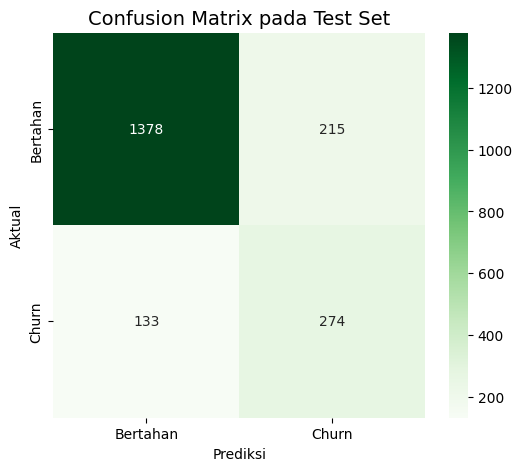

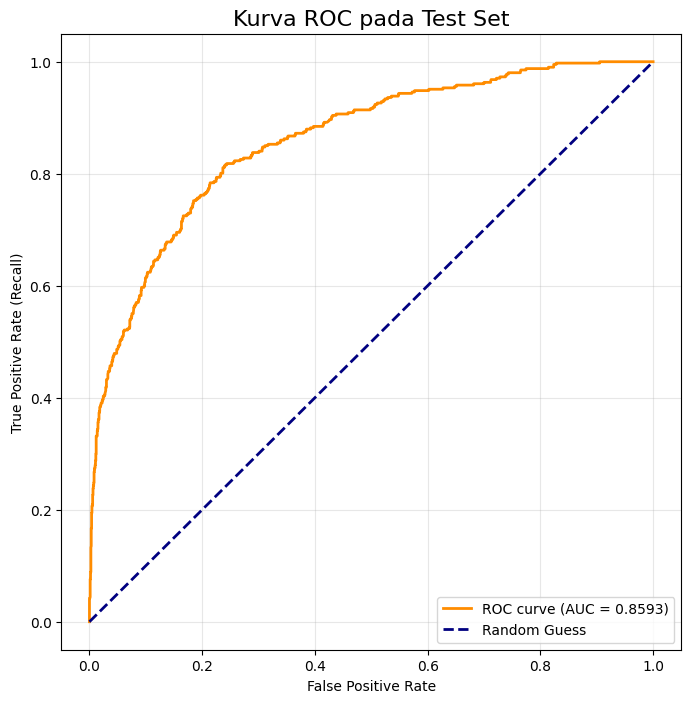

In [ ]:
# Final Model
final_model = grid_search.best_estimator_

# Predict pada dataset
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

# Menampilkan semua metriks evaluasi
print("\nLaporan Klasifikasi pada Test Set:")
print(classification_report(y_test, y_pred_test))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Bertahan', 'Churn'], yticklabels=['Bertahan', 'Churn'])
plt.title('Confusion Matrix pada Test Set', fontsize=14)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Visualisasi ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.title('Kurva ROC pada Test Set', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Berdasarkan evaluasi model didapatkan hasil

> Akurasi cukup tinggi di angka 83% sehingga dapat dikatakan model mampu memngklasifikasikan dengan benar sebagian besar dataset. 

> Pada nilai churn kelas 1

- Nilai recall 0.67, hal ini menunjukkan hasil yang cukup baik karena dapat menandai 2/3 dari total data yang memiliki risiko untuk pergi.

- Nilai precision 0.56, hal ini menunjukkan bahwa harus dilakukan analisis terhadap nasabah, walaupun terdapat beberapa nasabah yang tidak ingin pergi perlu dilakukan pendekatan lebih agar menurunkan kemungkinan churnnya.

- Nilai f1-score 0.61 menunjukkan adanya keseimbangan antara precision dan recall. Sehingga model belum cukup sempurna walaupun sudah baik.

> Pada nilai churn kelas 0

- Nilai recall, precision, dan F1-Score sangat baik, hal ini menunjukkan bahwa model sangat baik daam mengidentifikasi pelanggan yang tidak akan churn. Hal ini cukup wajar karena pada dataset jumlah data untuk kelas churn = 0 sangat dominan. 

> Model cukup efektif sebagai sebuah peringatan dini apabila akan menentukan nasabah yang akan pergi.

> Model cukup lemah dalam mendeteksi nilai False Positive.

# 9. Model Saving

In [ ]:
# Menyimpan model dalam sebuah file

joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']

# 10. Model Inference

Model terdapat pada file P1M1_riko_fadilah_inf.ipynb

# 11. Kesimpulan


> Churn cenderung terjadi pada pelanggan dengan rentan usia 40-60.

> Jika jumlah produk yang dimiliki nasabah lebih dari dua, kemungkinan mereka untuk melakukan churn cukup tinggi, apabila jumlah produk yang mereka miliki satu masih terdapat kemungkinan nasabah akan churn. Jika nasabah memiliki dua produk maka kemungkinan untuk tetap menggunakan jasa Bank ABC akan cukup tinggi.

> Sebagian besar pelanggan memiliki nilai saldo 0. Jumlahnya cukup tinggi yaitu 36%. Pada dataset nasabah yang memiliki saldo 0 memiliki tingkat churn yang rendah walaupun tidak terdapat saldo. 

> Kondisi dataset tidak seimbang sehingga perlu dilakukan penyeimbangan data dengan SMOTE. 

> Berdasarkan machine learning yang digunakan model Gradient Boosting memiliki performa yang paling tinggi. 

> Penggunaan hyperparameter dapat mengoptimalkan performa model.

> Kemampuan membedakan model sangat baik dengan nilai ROC-AUC sekitar 0.88

> Berdasarkan nilai recallnya, model ini dapat mengidentifikasi 2 dari 3 pelanggan yang sebenarnya akan pergi.

> Berdasarkan seluruh hasil analisis sebaiknya model digunakan untuk membuat daftar prioritas mingguan/bulanan yang harus dihubungi tim retensi agar tidak kehilangan nasabah.

> Prioritas agar nasabah memiliki dua produk dari Bank.
